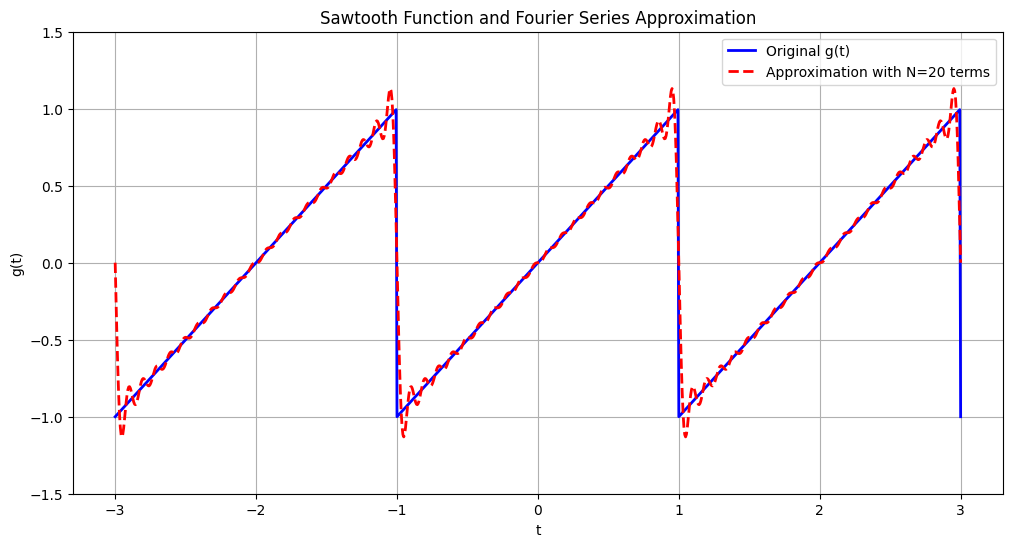

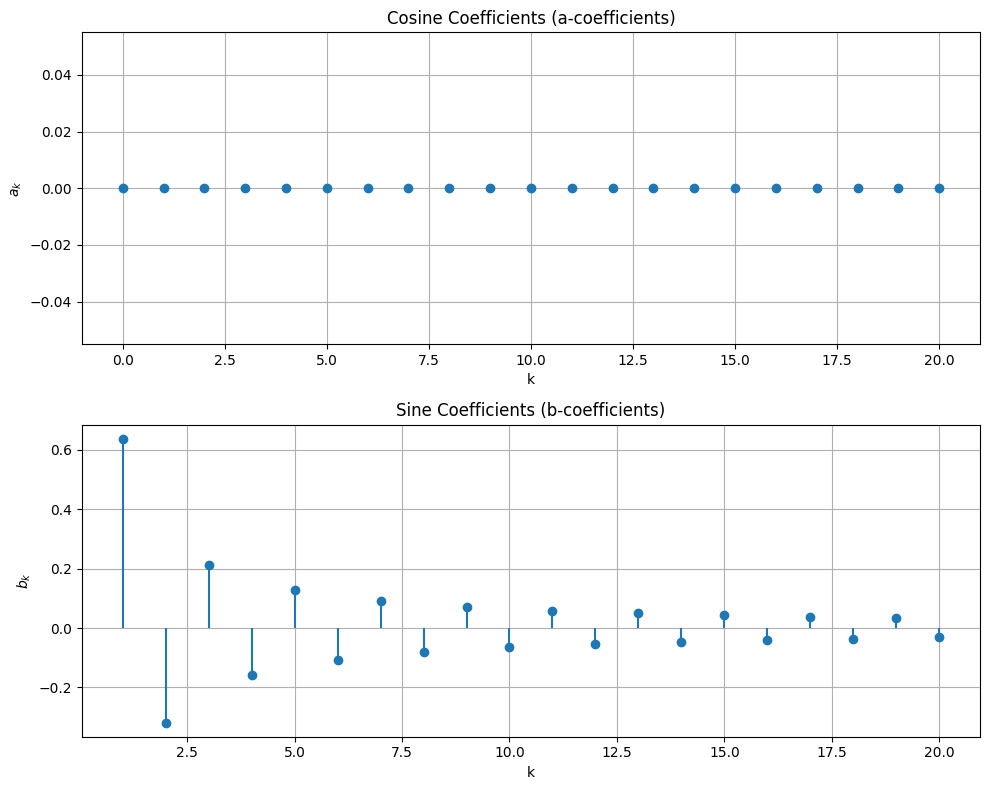

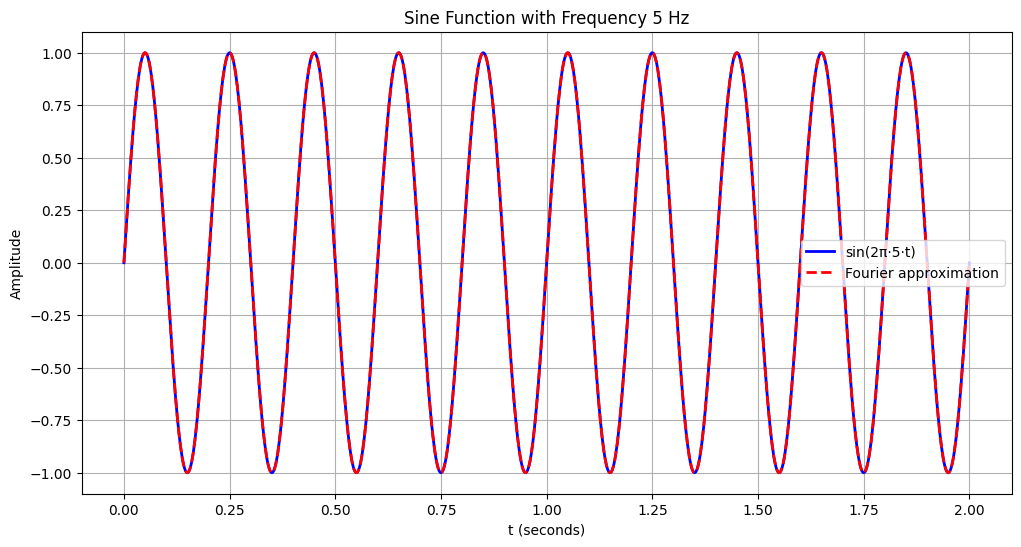

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def fs_synthesize(time_vals: np.ndarray, a_coeffs: np.ndarray,
                  b_coeffs: np.ndarray, T: float) -> np.ndarray:

    x_t = a_coeffs[0] / 2

    for k in range(1, len(a_coeffs)):
        x_t += a_coeffs[k] * np.cos(2 * np.pi * k * time_vals / T)

    for k in range(1, len(b_coeffs) + 1):
        x_t += b_coeffs[k - 1] * np.sin(2 * np.pi * k * time_vals / T)

    return x_t

# ============================================================================
# PART 1: Sawtooth Function Approximation
# ============================================================================

t = np.linspace(-3, 3, 1000)

def sawtooth(t, T=2):
    t_normalized = ((t + T/2) % T) - T/2
    return t_normalized

g_t = sawtooth(t)

plt.figure(figsize=(12, 6))
plt.plot(t, g_t, label='Original g(t)', linewidth=2, color='blue')

N = 20  # Try changing this: 5, 10, 20, 50, 100

a_coeffs = np.zeros(N + 1)

b_coeffs = np.zeros(N)
for k in range(1, N + 1):
    b_coeffs[k - 1] = -(2 * np.pi * k * np.cos(np.pi * k)) / (np.pi**2 * k**2)

T = 2
g_approx = fs_synthesize(t, a_coeffs, b_coeffs, T)

plt.plot(t, g_approx, label=f'Approximation with N={N} terms',
         linewidth=2, linestyle='--', color='red')

plt.xlabel('t')
plt.ylabel('g(t)')
plt.title('Sawtooth Function and Fourier Series Approximation')
plt.legend()
plt.grid(True)
plt.ylim(-1.5, 1.5)
plt.show()

# ============================================================================
# PART 2: Explain the meaning of a- and b-coefficients
# ============================================================================

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

k_values = np.arange(len(a_coeffs))
ax1.stem(k_values, a_coeffs, basefmt=" ")
ax1.set_xlabel('k')
ax1.set_ylabel('$a_k$')
ax1.set_title('Cosine Coefficients (a-coefficients)')
ax1.grid(True)

k_values_b = np.arange(1, len(b_coeffs) + 1)
ax2.stem(k_values_b, b_coeffs, basefmt=" ")
ax2.set_xlabel('k')
ax2.set_ylabel('$b_k$')
ax2.set_title('Sine Coefficients (b-coefficients)')
ax2.grid(True)

plt.tight_layout()
plt.show()

# ============================================================================
# PART 3: Sine function with frequency 5 Hz
# ============================================================================

T_sine = 1
freq = 5

a_coeffs_sine = np.zeros(10)

b_coeffs_sine = np.zeros(10)
b_coeffs_sine[4] = 1  # k=5, so index 4

t_test = np.linspace(0, 2, 1000)
sine_approx = fs_synthesize(t_test, a_coeffs_sine, b_coeffs_sine, T_sine)
sine_actual = np.sin(2 * np.pi * 5 * t_test)

plt.figure(figsize=(12, 6))
plt.plot(t_test, sine_actual, label='sin(2π·5·t)', linewidth=2, color='blue')
plt.plot(t_test, sine_approx, '--', label='Fourier approximation',
         linewidth=2, color='red')
plt.xlabel('t (seconds)')
plt.ylabel('Amplitude')
plt.title('Sine Function with Frequency 5 Hz')
plt.legend()
plt.grid(True)
plt.show()

In [2]:
import numpy as np
from matplotlib import pyplot as plt

def dft(x: np.ndarray) -> np.ndarray:
    """compute the discrete Fourier transform"""

    N = len(x)
    X = np.zeros(N, dtype=complex)

    for k in range(N):
        for n in range(N):
            X[k] += x[n] * np.exp(-2j * np.pi * k * n / N)  # Changed x[k] to X[k]
    return X


def idft(X: np.ndarray) -> np.ndarray:
    """compute the inverse discrete Fourier transform"""
    N = len(X)
    x = np.zeros(N, dtype=complex)

    for n in range(N):
        for k in range(N):
            x[n] += X[k] * np.exp(2j * np.pi * k * n / N)  # Removed /N from here

    x = x / N  # Division by N only once at the end
    return x

def dft_vectorized(x: np.ndarray) -> np.ndarray:
    """Vectorized DFT implementation"""
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    return np.dot(e, x)

def idft_vectorized(X: np.ndarray) -> np.ndarray:
    """Vectorized IDFT implementation"""
    N = len(X)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(2j * np.pi * k * n / N)
    return np.dot(e, X) / N


# Test
x = np.array([1, 2, 3, 4])

# Your DFT
X_mine = dft(x)

# NumPy's DFT
X_numpy = np.fft.fft(x)

# Compare (should be almost identical)
print("Your DFT:", X_mine)
print("NumPy DFT:", X_numpy)
print("Difference:", np.abs(X_mine - X_numpy))

# Test reconstruction: x(n) = iDFT{DFT{x(n)}}
x_reconstructed = idft(X_mine)
print("\nOriginal:", x)
print("Reconstructed:", x_reconstructed.real)

# Test vectorized versions
print("\n" + "="*60)
print("Testing vectorized versions:")
X_vec = dft_vectorized(x)
print("Vectorized DFT:", X_vec)
print("Difference from numpy:", np.abs(X_vec - X_numpy))

x_vec_reconstructed = idft_vectorized(X_vec)
print("\nVectorized reconstructed:", x_vec_reconstructed.real)
print("Difference from original:", np.abs(x_vec_reconstructed - x))

Your DFT: [10.+0.00000000e+00j -2.+2.00000000e+00j -2.-9.79717439e-16j
 -2.-2.00000000e+00j]
NumPy DFT: [10.+0.j -2.+2.j -2.+0.j -2.-2.j]
Difference: [0.00000000e+00 6.28036983e-16 9.79717439e-16 1.98602732e-15]

Original: [1 2 3 4]
Reconstructed: [1. 2. 3. 4.]

Testing vectorized versions:
Vectorized DFT: [10.+0.00000000e+00j -2.+2.00000000e+00j -2.-9.79717439e-16j
 -2.-2.00000000e+00j]
Difference from numpy: [0.00000000e+00 6.28036983e-16 9.79717439e-16 1.98602732e-15]

Vectorized reconstructed: [1. 2. 3. 4.]
Difference from original: [7.28899795e-16 2.48949813e-16 3.43271324e-17 2.48949813e-16]


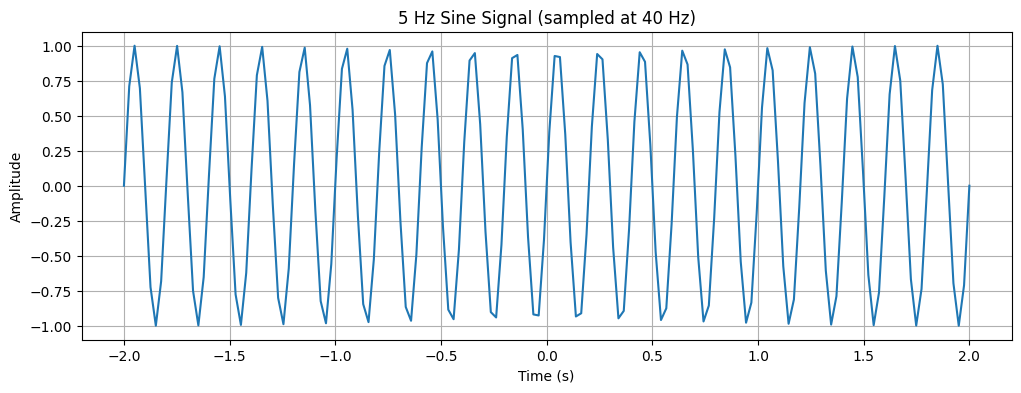

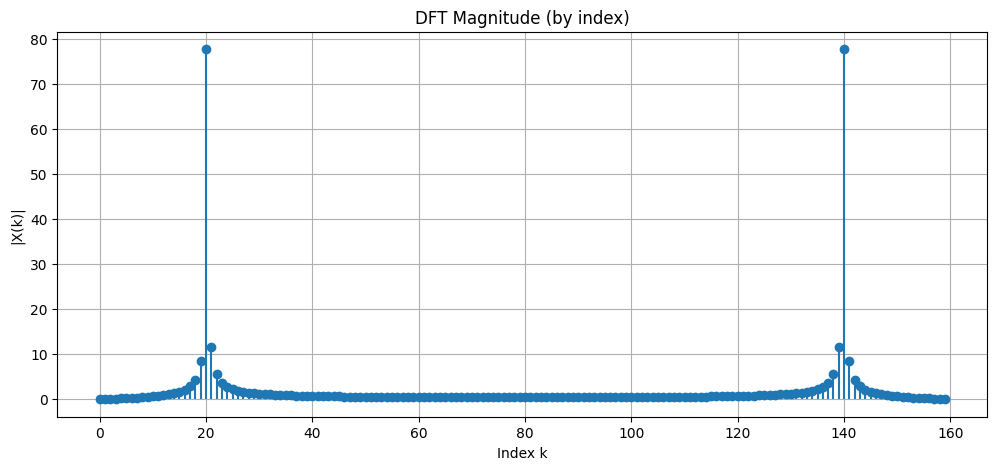

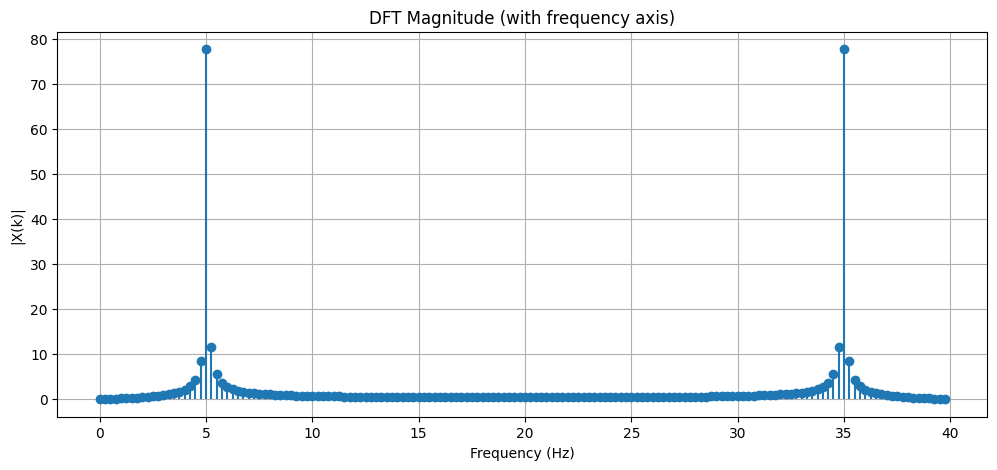

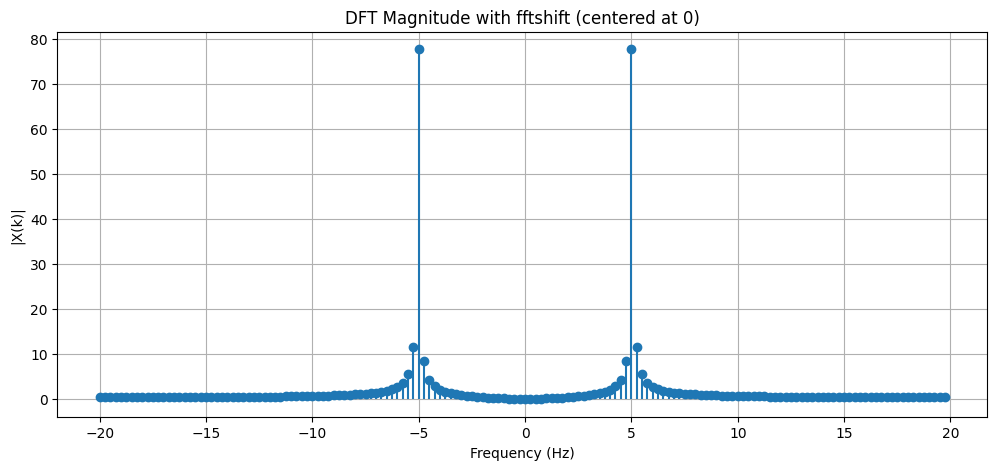

What fftshift does: Moves zero frequency to center
Before: [0.   0.25 0.5  0.75 1.   1.25 1.5  1.75]
After: [-20.   -19.75 -19.5  -19.25 -19.   -18.75 -18.5  -18.25]

Why TWO peaks at ±5 Hz?
sin(ωt) = (1/2j)[exp(jωt) - exp(-jωt)]
This means sine = positive frequency + negative frequency
That's why we see peaks at BOTH +5 Hz and -5 Hz!


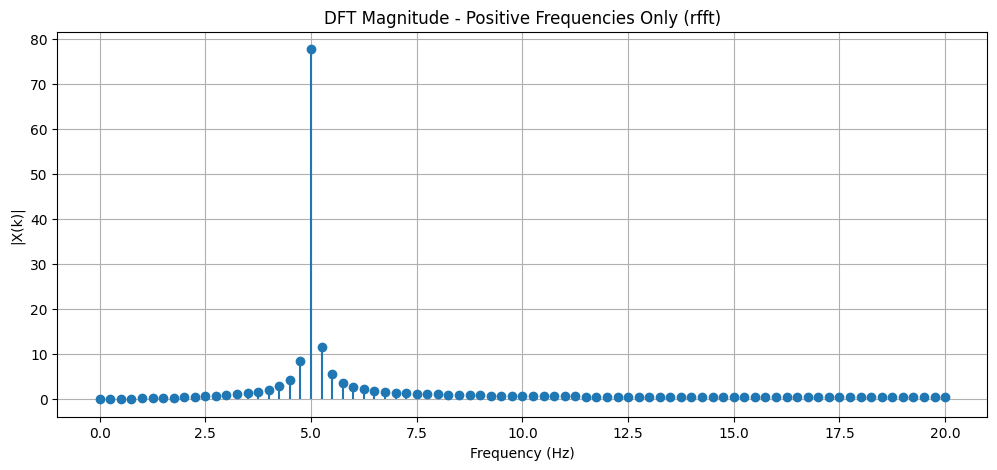

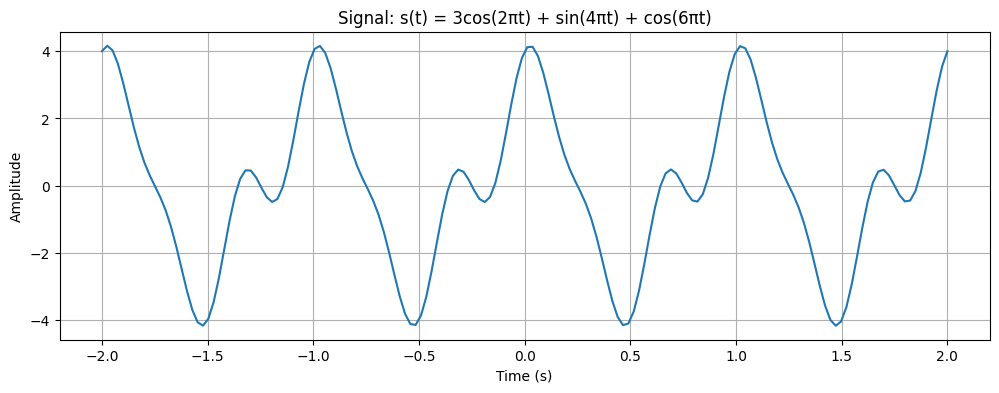

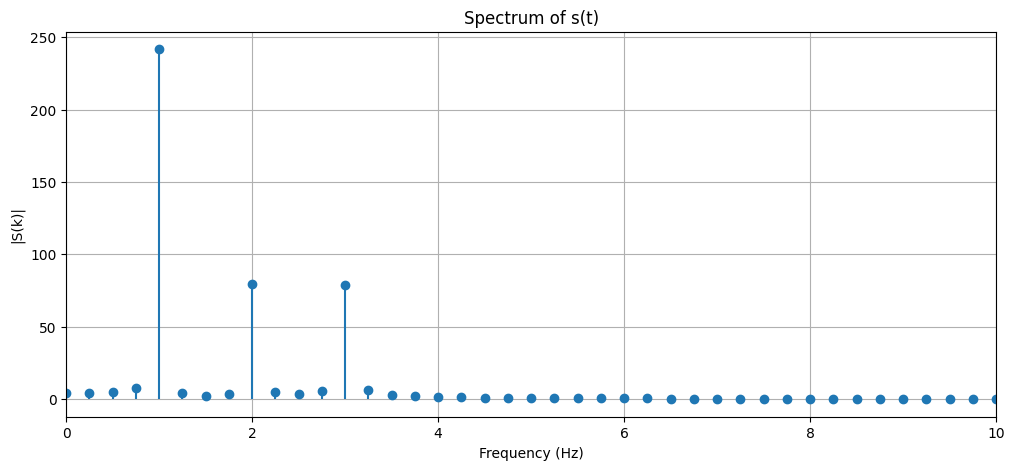


Expected peaks in s(t) spectrum:
• 1 Hz: from 3cos(2πt) → large peak
• 2 Hz: from sin(4πt) → medium peak
• 3 Hz: from cos(6πt) → medium peak


In [3]:
import numpy as np
from matplotlib import pyplot as plt

# Use the dft_vectorized from before
def dft_vectorized(x: np.ndarray) -> np.ndarray:
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    return np.dot(e, x)

# ============================================================================
# STEP 1: Generate 5 Hz sine signal, sampled at 40 Hz
# ============================================================================
fs = 40  # sampling rate
f_signal = 5  # signal frequency
t = np.linspace(-2, 2, fs * 4)  # 160 samples over 4 seconds
sin_vals = np.sin(2 * np.pi * f_signal * t)

plt.figure(figsize=(12, 4))
plt.plot(t, sin_vals)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f'{f_signal} Hz Sine Signal (sampled at {fs} Hz)')
plt.grid(True)
plt.show()

# ============================================================================
# STEP 2: Calculate DFT and plot magnitude
# ============================================================================
N = len(sin_vals)
X = np.fft.fft(sin_vals)  # using numpy's FFT

plt.figure(figsize=(12, 5))
plt.stem(np.arange(N), np.abs(X), basefmt=" ")
plt.xlabel('Index k')
plt.ylabel('|X(k)|')
plt.title('DFT Magnitude (by index)')
plt.grid(True)
plt.show()

# ============================================================================
# STEP 3: Implement dftfreq function
# ============================================================================
def dftfreq(N: int, fs: int) -> np.ndarray:
    """Convert DFT indices to frequencies: fk = k * fs/N"""
    return np.arange(N) * fs / N

# Plot with frequencies
freqs_mine = dftfreq(N, fs)

plt.figure(figsize=(12, 5))
plt.stem(freqs_mine, np.abs(X), basefmt=" ")
plt.xlabel('Frequency (Hz)')
plt.ylabel('|X(k)|')
plt.title('DFT Magnitude (with frequency axis)')
plt.grid(True)
plt.show()

# ============================================================================
# STEP 4: Use fftfreq and fftshift (shows negative + positive frequencies)
# ============================================================================
freqs = np.fft.fftfreq(N, 1/fs)

plt.figure(figsize=(12, 5))
plt.stem(np.fft.fftshift(freqs), np.fft.fftshift(np.abs(X)), basefmt=" ")
plt.xlabel('Frequency (Hz)')
plt.ylabel('|X(k)|')
plt.title('DFT Magnitude with fftshift (centered at 0)')
plt.grid(True)
plt.show()

print("What fftshift does: Moves zero frequency to center")
print("Before:", freqs[:8])
print("After:", np.fft.fftshift(freqs)[:8])

# ============================================================================
# STEP 5: Why TWO peaks?
# ============================================================================
print("\n" + "="*60)
print("Why TWO peaks at ±5 Hz?")
print("="*60)
print("sin(ωt) = (1/2j)[exp(jωt) - exp(-jωt)]")
print("This means sine = positive frequency + negative frequency")
print("That's why we see peaks at BOTH +5 Hz and -5 Hz!")

# ============================================================================
# STEP 6: Use rfft (only positive frequencies for real signals)
# ============================================================================
X_real = np.fft.rfft(sin_vals)
freqs_real = np.fft.rfftfreq(N, 1/fs)

plt.figure(figsize=(12, 5))
plt.stem(freqs_real, np.abs(X_real), basefmt=" ")
plt.xlabel('Frequency (Hz)')
plt.ylabel('|X(k)|')
plt.title('DFT Magnitude - Positive Frequencies Only (rfft)')
plt.grid(True)
plt.show()

# ============================================================================
# STEP 7: Analyze complex signal s(t) = 3cos(2πt) + sin(4πt) + cos(6πt)
# ============================================================================
t_complex = np.linspace(-2, 2, fs * 4)
s_t = (3 * np.cos(2 * np.pi * 1 * t_complex) +
       np.sin(2 * np.pi * 2 * t_complex) +
       np.cos(2 * np.pi * 3 * t_complex))

# Plot the signal
plt.figure(figsize=(12, 4))
plt.plot(t_complex, s_t)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Signal: s(t) = 3cos(2πt) + sin(4πt) + cos(6πt)')
plt.grid(True)
plt.show()

# Plot spectrum
S = np.fft.rfft(s_t)
freqs_s = np.fft.rfftfreq(len(s_t), 1/fs)

plt.figure(figsize=(12, 5))
plt.stem(freqs_s, np.abs(S), basefmt=" ")
plt.xlabel('Frequency (Hz)')
plt.ylabel('|S(k)|')
plt.title('Spectrum of s(t)')
plt.grid(True)
plt.xlim(0, 10)
plt.show()

print("\n" + "="*60)
print("Expected peaks in s(t) spectrum:")
print("="*60)
print("• 1 Hz: from 3cos(2πt) → large peak")
print("• 2 Hz: from sin(4πt) → medium peak")
print("• 3 Hz: from cos(6πt) → medium peak")

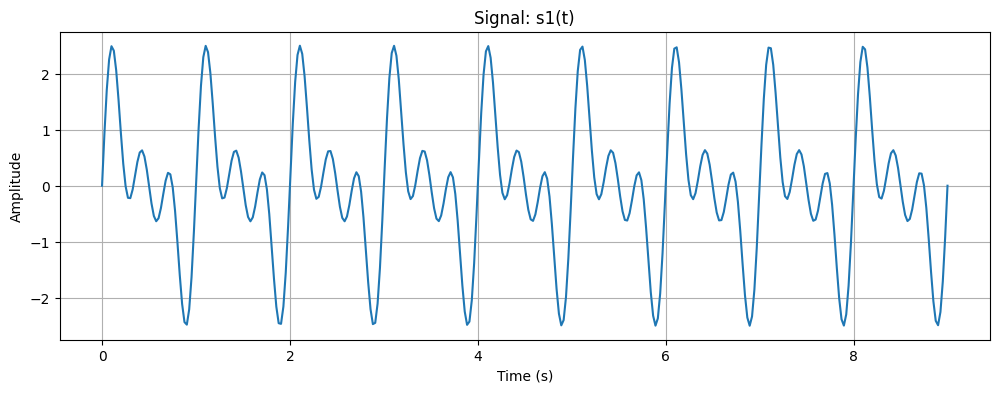

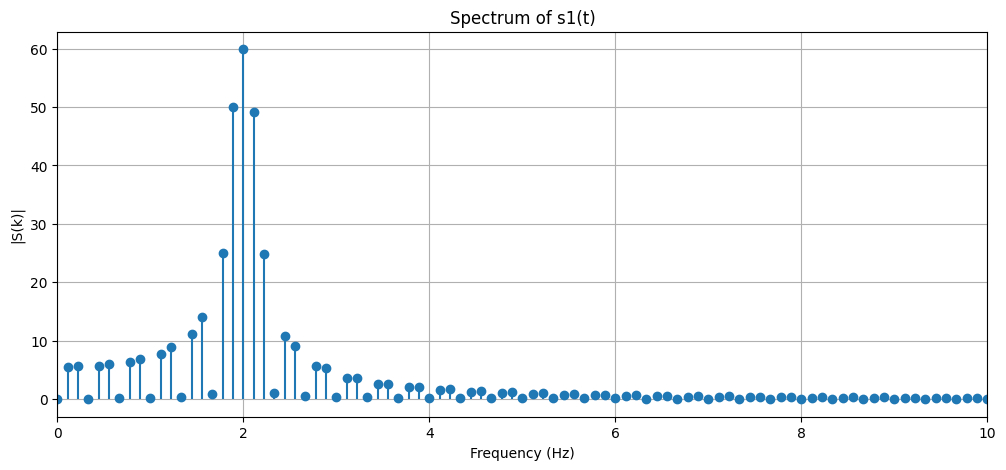

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import stft

t = np.linspace(0, 9, 360)

fs = 40  # Sampling frequency
N = len(t)  # Number of samples




s1 = np.sin(2* np.pi * t) + np.sin(4* np.pi * t) + np.sin(6* np.pi * t)

sa = np.where((t < 3) & (t >= 0) , 3 * np.sin(2 * np.pi * t), 0)

sb = np.where((t < 6) & (t >= 3) ,  np.sin(4 * np.pi * t), 0)

sc = np.where((t < 9) & (t >= 6) ,  np.sin(6 * np.pi * t), 0)

s2 = sa + sb + sc

X_real = np.fft.rfft(sb)
freqs_real = np.fft.rfftfreq(N, 1/fs)


plt.figure(figsize=(12, 4))
plt.plot(t, s1)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Signal: s1(t)')
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 5))
plt.stem(freqs_real, np.abs(X_real), basefmt=" ")
plt.xlabel('Frequency (Hz)')
plt.ylabel('|S(k)|')
plt.title('Spectrum of s1(t)')
plt.grid(True)
plt.xlim(0, 10)
plt.show()





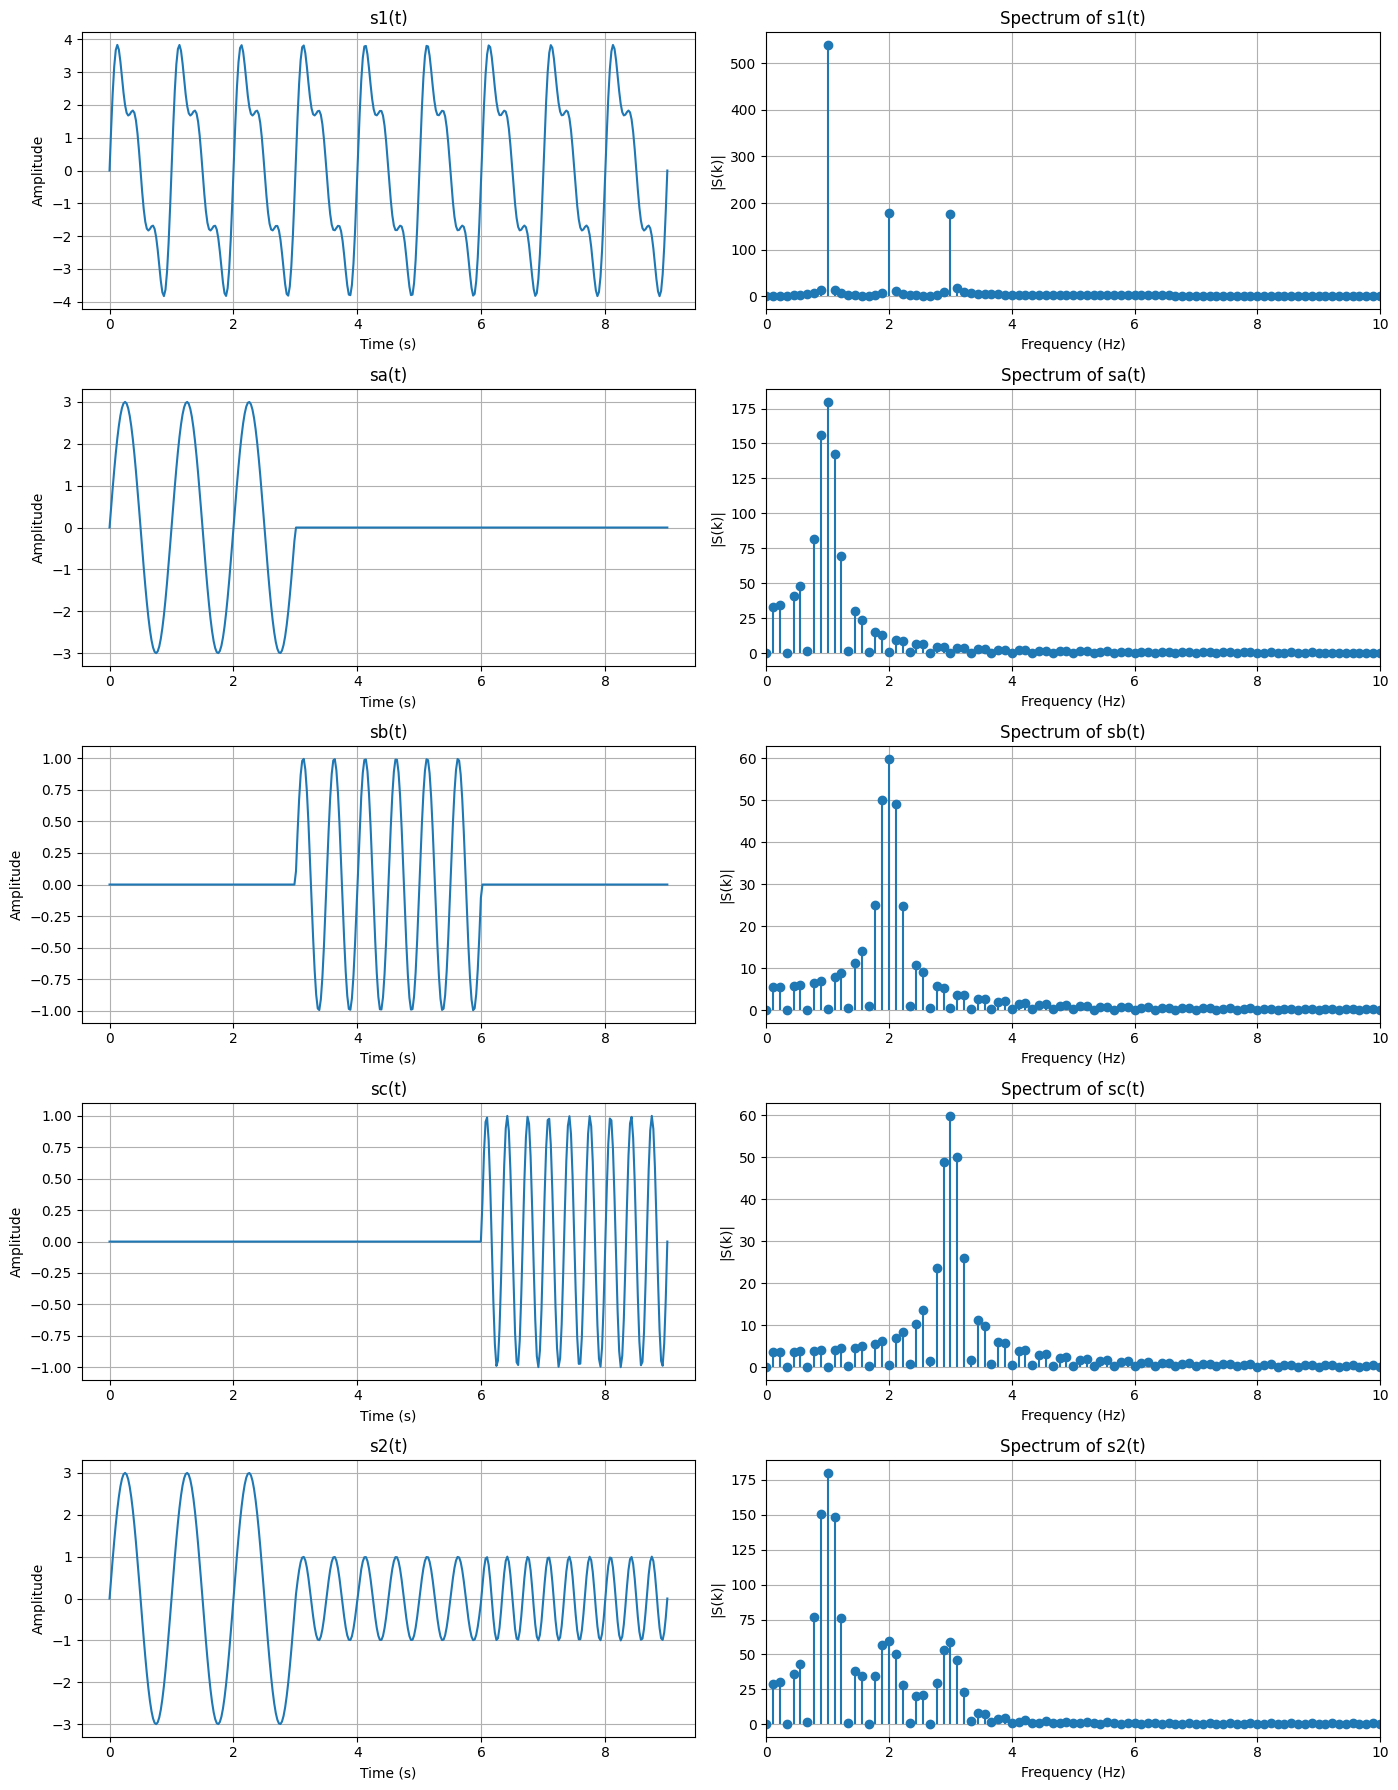

In [5]:


signals = {
    "s1": 3* np.sin(2*np.pi*t) + np.sin(4*np.pi*t) + np.sin(6*np.pi*t),
    "sa": np.where((t >= 0) & (t < 3), 3*np.sin(2*np.pi*t), 0),
    "sb": np.where((t >= 3) & (t < 6), np.sin(4*np.pi*t), 0),
    "sc": np.where((t >= 6) & (t < 9), np.sin(6*np.pi*t), 0)
}
signals["s2"] = signals["sa"] + signals["sb"] + signals["sc"]


fig, axes = plt.subplots(5, 2, figsize=(14, 18))
axes = axes.flatten()


for i, (label, sig) in enumerate(signals.items()):

    axes[2*i].plot(t, sig)
    axes[2*i].set_title(f"{label}(t)")
    axes[2*i].set_xlabel("Time (s)")
    axes[2*i].set_ylabel("Amplitude")
    axes[2*i].grid(True)


    X = np.fft.rfft(sig)
    freqs = np.fft.rfftfreq(N, 1/fs)
    axes[2*i + 1].stem(freqs, np.abs(X), basefmt=" ")
    axes[2*i + 1].set_title(f"Spectrum of {label}(t)")
    axes[2*i + 1].set_xlim(0, 10)
    axes[2*i + 1].set_xlabel('Frequency (Hz)')
    axes[2*i + 1].set_ylabel('|S(k)|')
    axes[2*i + 1].grid(True)

plt.tight_layout()
plt.show()

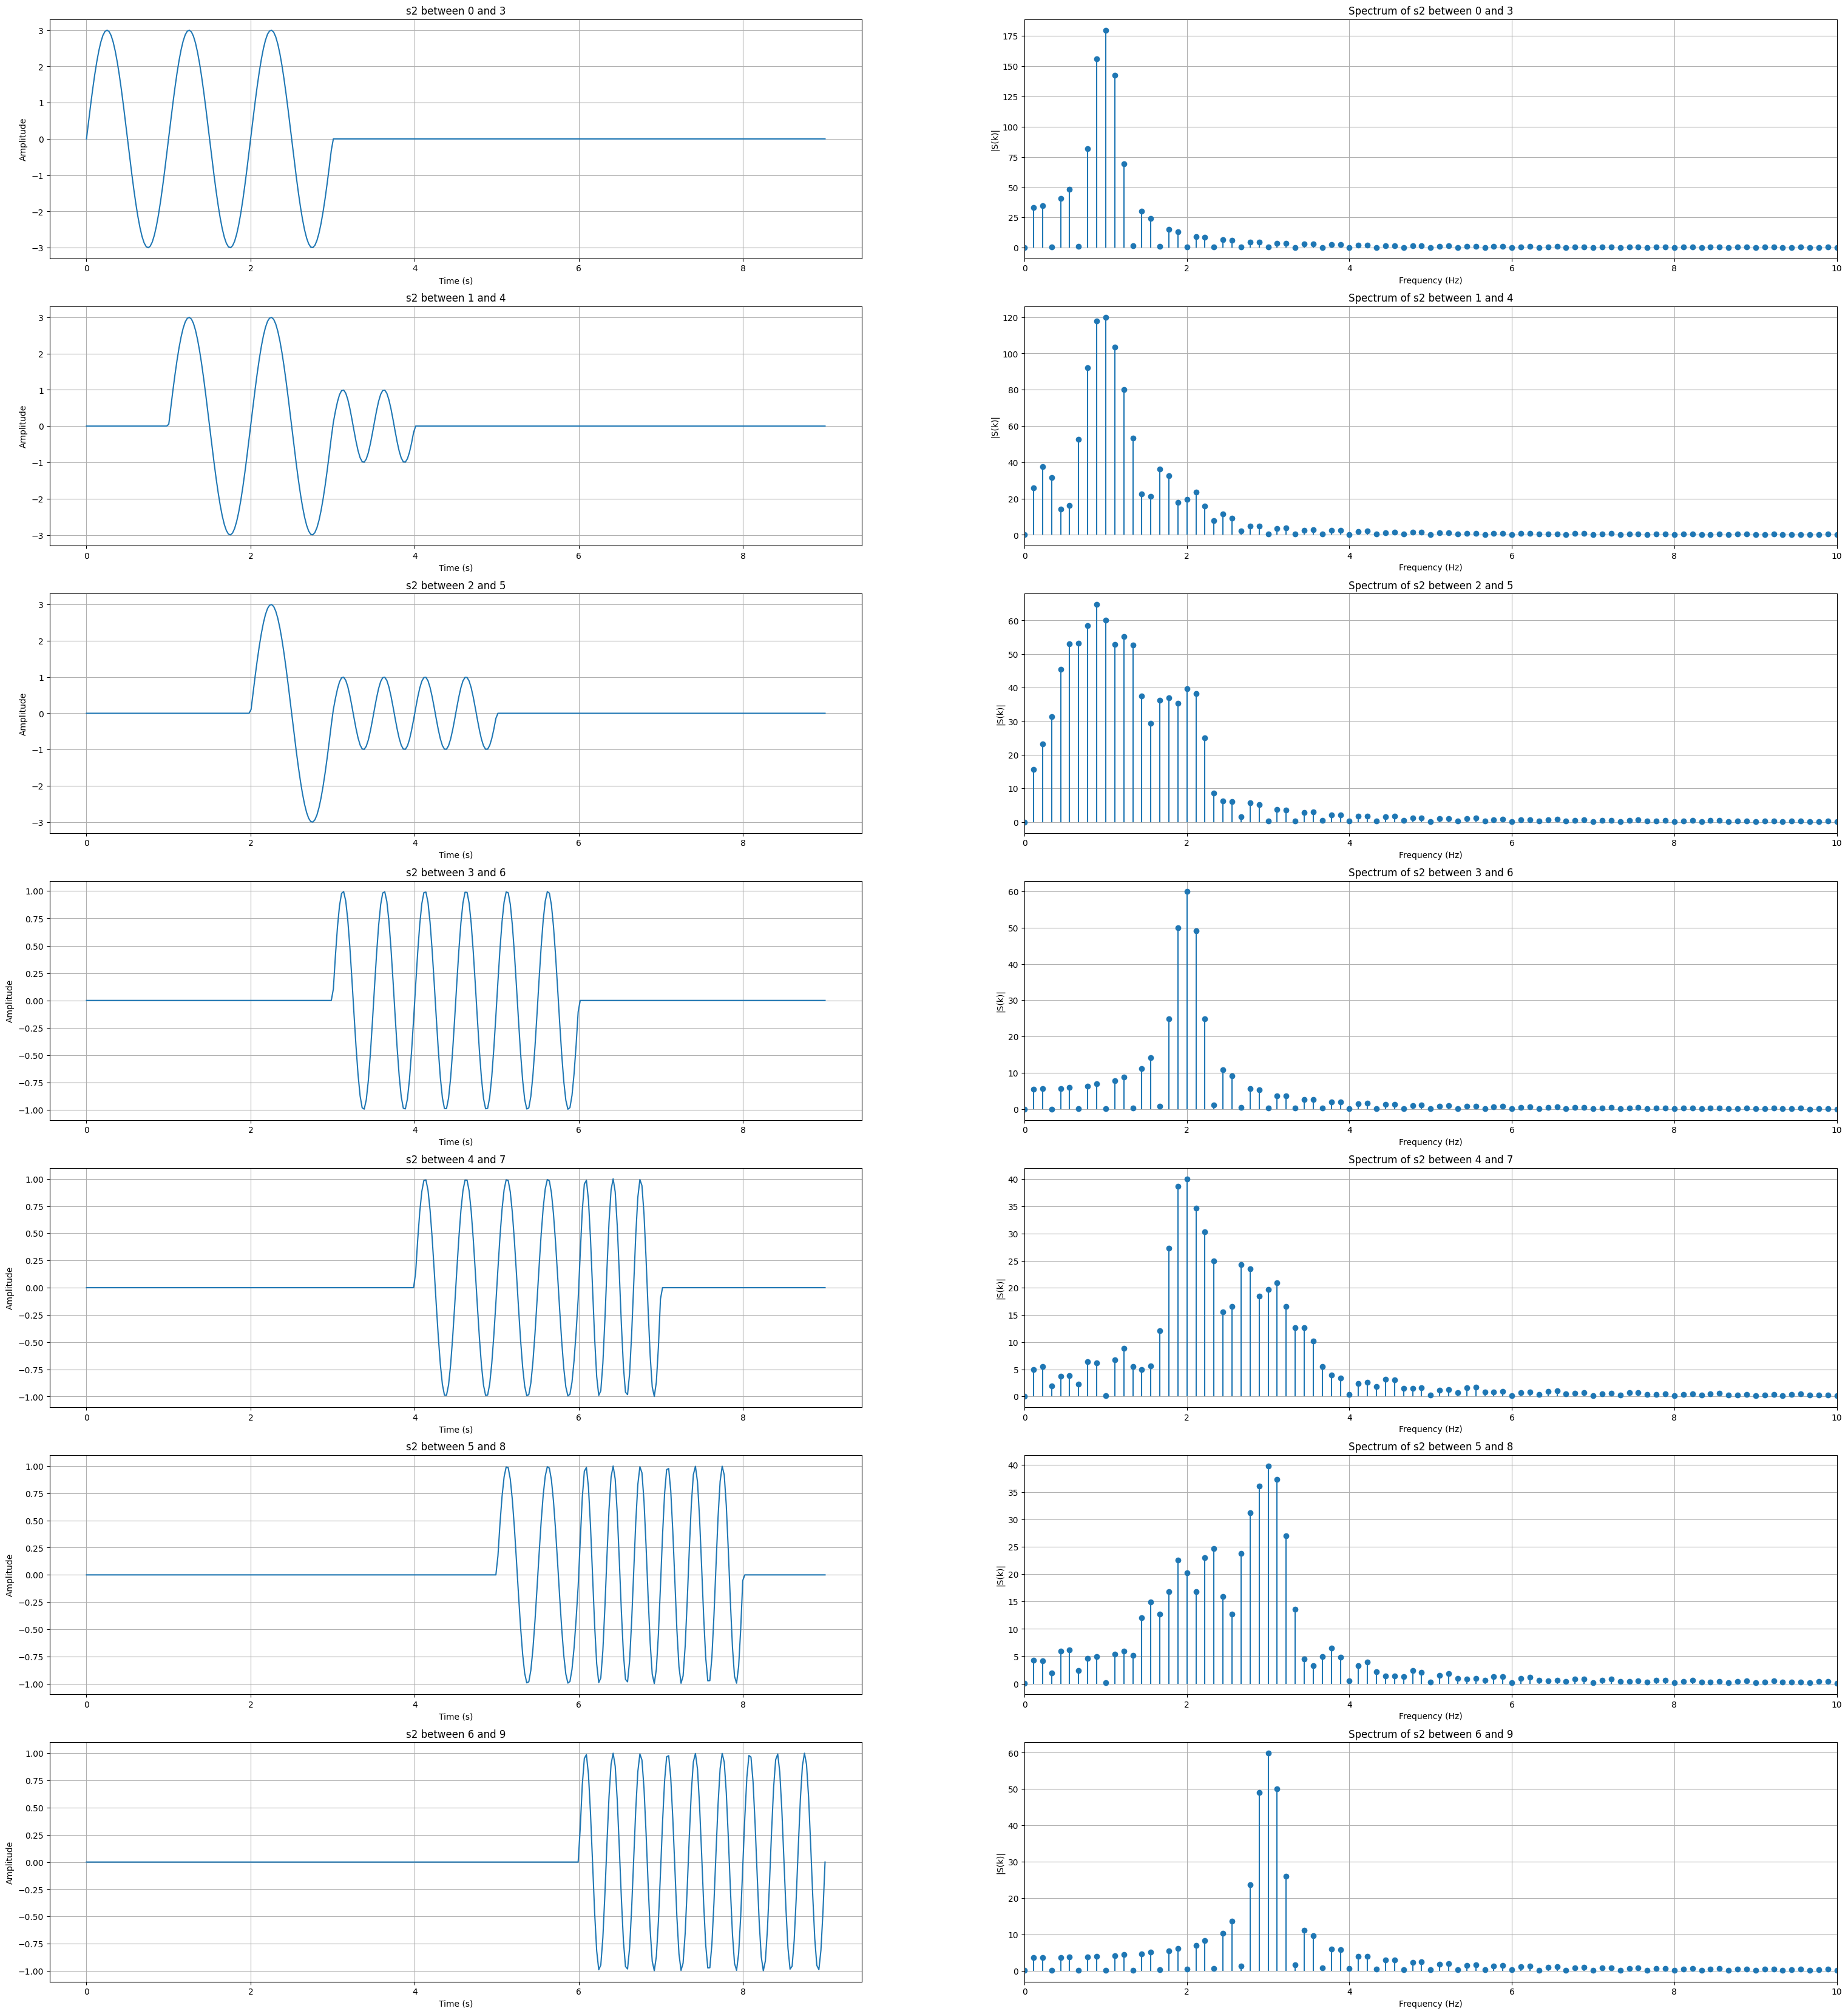

In [6]:
signals = {
    "s1": np.sin(2*np.pi*t) + np.sin(4*np.pi*t) + np.sin(6*np.pi*t),
    "sa": np.where((t >= 0) & (t < 3), 3*np.sin(2*np.pi*t), 0),
    "sb": np.where((t >= 3) & (t < 6), np.sin(4*np.pi*t), 0),
    "sc": np.where((t >= 6) & (t < 9), np.sin(6*np.pi*t), 0)
}

s2 = signals["sa"] + signals["sb"] + signals["sc"]
fig, axs = plt.subplots(7, 2, figsize=(38, 42))

axs = axs.flatten()
for i in range(0, 7):
    f = np.where((t >= i) & (t < i+3),s2, 0)
    axs[2 * i].plot(t, f)
    axs[2*i].set_title(f"s2 between {i} and {i + 3}")
    axs[2*i].set_xlabel("Time (s)")
    axs[2*i].set_ylabel("Amplitude")
    axs[2*i].grid(True)

    X = np.fft.rfft(f)
    freqs = np.fft.rfftfreq(N, 1/fs)
    axs[2 * i + 1].stem(freqs, np.abs(X), basefmt=" ")
    axs[2 * i + 1].set_xlim(0, 10)
    axs[2*i + 1].set_title(f"Spectrum of s2 between {i} and {i + 3}")
    axs[2*i + 1].set_xlim(0, 10)
    axs[2*i + 1].set_xlabel('Frequency (Hz)')
    axs[2*i + 1].set_ylabel('|S(k)|')
    axs[2*i + 1].grid(True)










61 [ 0.          0.33333333  0.66666667  1.          1.33333333  1.66666667
  2.          2.33333333  2.66666667  3.          3.33333333  3.66666667
  4.          4.33333333  4.66666667  5.          5.33333333  5.66666667
  6.          6.33333333  6.66666667  7.          7.33333333  7.66666667
  8.          8.33333333  8.66666667  9.          9.33333333  9.66666667
 10.         10.33333333 10.66666667 11.         11.33333333 11.66666667
 12.         12.33333333 12.66666667 13.         13.33333333 13.66666667
 14.         14.33333333 14.66666667 15.         15.33333333 15.66666667
 16.         16.33333333 16.66666667 17.         17.33333333 17.66666667
 18.         18.33333333 18.66666667 19.         19.33333333 19.66666667
 20.        ] [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.] [[3.16775893e-01 4.96381576e-02 3.85046509e-02 2.63084316e-01
  3.39571708e-02 5.36150601e-03 1.90320660e-02 4.77998665e-03
  9.14289426e-03 3.46035010e-02]
 [4.42462960e-01 5.00110598e-02 3.88874528e-02 3.88756429e-01
  

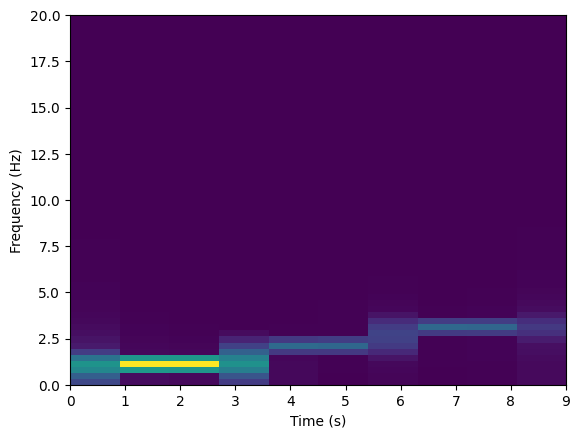

In [7]:
from scipy.signal import stft
import numpy as np

freqArray, timeArray, s2Stft = stft(s2,fs= 40, nperseg=120, noverlap=80, window="hann", padded = False)

print(len(np.abs(s2Stft)), freqArray, timeArray, np.abs(s2Stft))


plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.imshow(np.abs(s2Stft), origin='lower', aspect='auto', extent=[timeArray[0], timeArray[-1], freqArray[0], freqArray[-1]])

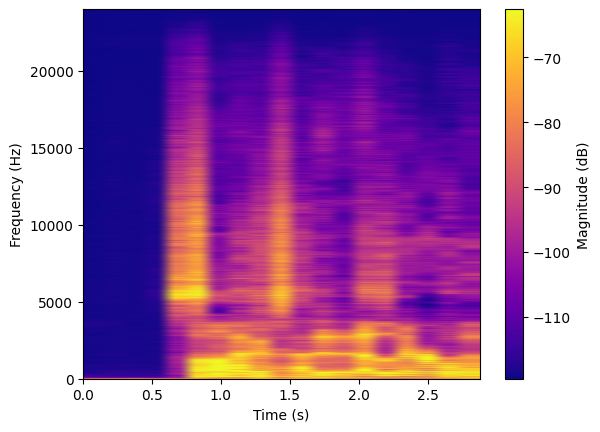

In [8]:
import soundfile as sf
from matplotlib import pyplot as plt
import numpy as np

data, samplerate = sf.read('../data/00252_4.9dB_PCM16.wav')
segmentLength = int(samplerate / 100 * 32)
overlap = int(segmentLength / 2)
dataFreqArray, dataTimeArray, dataStft = stft(data,fs= samplerate, nperseg=segmentLength, noverlap=overlap, window="hann")
timeMask = dataTimeArray <= 3


magnitude = np.abs(dataStft[:, timeMask])
magnitude_db = 20 * np.log10(magnitude + 1e-6)


vmin = np.percentile(magnitude_db, 5)
vmax = np.percentile(magnitude_db, 99)
magnitude_db_clipped = np.clip(magnitude_db, vmin, vmax)

plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")


plt.imshow(magnitude_db_clipped,
           origin='lower',
           aspect='auto',
           extent=[dataTimeArray[timeMask][0], dataTimeArray[timeMask][-1], dataFreqArray[0], dataFreqArray[-1]],
           cmap='plasma')
cbar = plt.colorbar()
cbar.set_label("Magnitude (dB)")



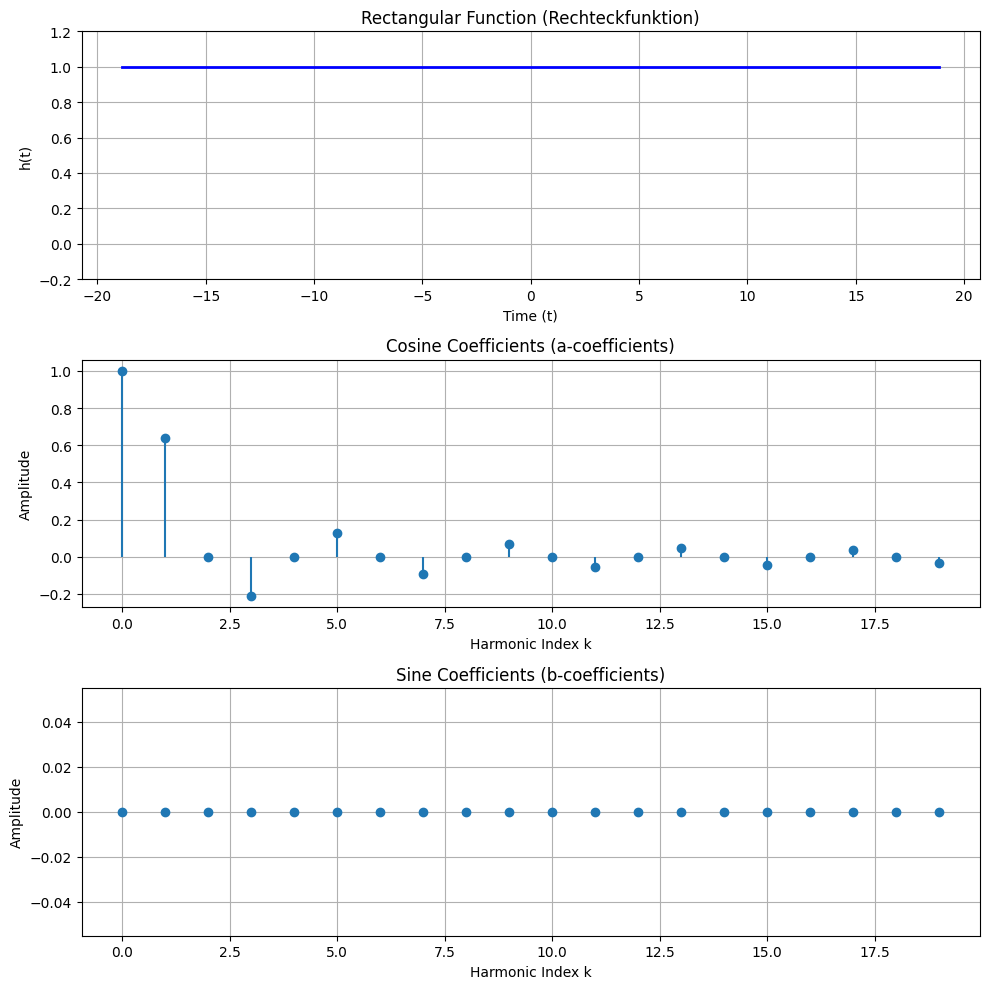

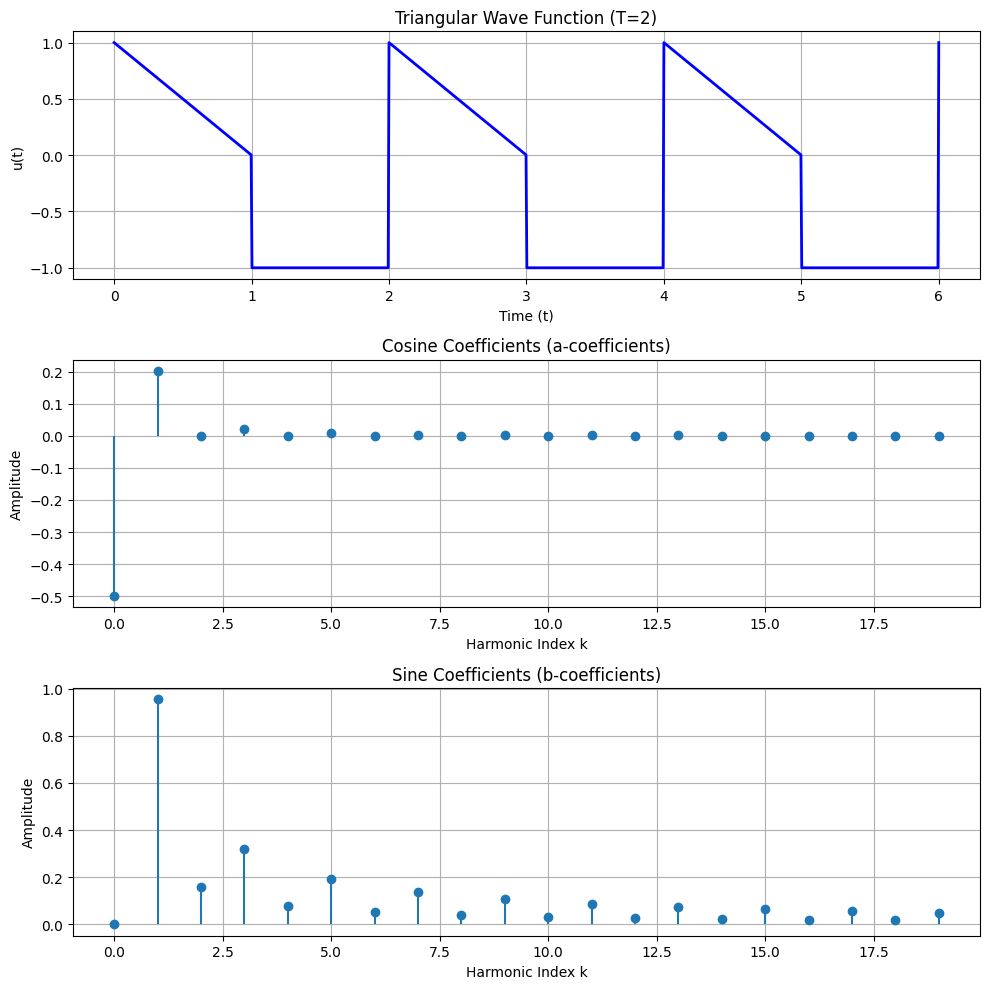

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Rectangular function
def plot_rectangular_with_coeffs():
    t = np.linspace(-6*np.pi, 6*np.pi, 1000)
    h = np.zeros_like(t)
    period = 2*np.pi
    t_mod = np.mod(t + np.pi, period) - np.pi
    h[np.abs(t_mod) <= np.pi] = 1

    N = 20
    a_coeffs = np.zeros(N)
    b_coeffs = np.zeros(N)
    a_coeffs[0] = 1
    for k in range(1, N):
        a_coeffs[k] = (2/(np.pi*k)) * np.sin(np.pi*k/2)
        b_coeffs[k] = 0

    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))
    ax1.plot(t, h, 'b-', linewidth=2)
    ax1.set_xlabel('Time (t)')
    ax1.set_ylabel('h(t)')
    ax1.set_title('Rectangular Function (Rechteckfunktion)')
    ax1.grid(True)
    ax1.set_ylim([-0.2, 1.2])

    ax2.stem(range(N), a_coeffs, basefmt=' ')
    ax2.set_xlabel('Harmonic Index k')
    ax2.set_ylabel('Amplitude')
    ax2.set_title('Cosine Coefficients (a-coefficients)')
    ax2.grid(True)

    ax3.stem(range(N), b_coeffs, basefmt=' ')
    ax3.set_xlabel('Harmonic Index k')
    ax3.set_ylabel('Amplitude')
    ax3.set_title('Sine Coefficients (b-coefficients)')
    ax3.grid(True)

    plt.tight_layout()
    plt.savefig('../results/figures/rectangular_function_coeffs.png', dpi=300, bbox_inches='tight')
    plt.show()

# Triangular wave function
def plot_triangular_with_coeffs():
    t = np.linspace(0, 6, 1000)
    u = np.zeros_like(t)
    for i, time in enumerate(t):
        t_mod = np.mod(time, 2)
        if t_mod < 1:
            u[i] = 1 - t_mod
        else:
            u[i] = -1

    N = 20
    a_coeffs = np.zeros(N)
    b_coeffs = np.zeros(N)
    a_coeffs[0] = -0.5
    for k in range(1, N):
        a_coeffs[k] = -(np.cos(k*np.pi) - 1) / (k**2 * np.pi**2)
        b_coeffs[k] = (2 - np.cos(k*np.pi)) / (k*np.pi)

    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))
    ax1.plot(t, u, 'b-', linewidth=2)
    ax1.set_xlabel('Time (t)')
    ax1.set_ylabel('u(t)')
    ax1.set_title('Triangular Wave Function (T=2)')
    ax1.grid(True)

    ax2.stem(range(N), a_coeffs, basefmt=' ')
    ax2.set_xlabel('Harmonic Index k')
    ax2.set_ylabel('Amplitude')
    ax2.set_title('Cosine Coefficients (a-coefficients)')
    ax2.grid(True)

    ax3.stem(range(N), b_coeffs, basefmt=' ')
    ax3.set_xlabel('Harmonic Index k')
    ax3.set_ylabel('Amplitude')
    ax3.set_title('Sine Coefficients (b-coefficients)')
    ax3.grid(True)

    plt.tight_layout()
    plt.savefig('../results/figures/triangular_function_coeffs.png', dpi=300, bbox_inches='tight')
    plt.show()

plot_rectangular_with_coeffs()
plot_triangular_with_coeffs()